In [24]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [25]:
import pandas as pd

data = pd.read_csv(
    r"C:\Users\grees\Downloads\3_chunks\KALTURA_3DATASET_MERGED\prediction_2_files\object_ids_2024_aug_to_dec_object_id.csv"
)

print(data.shape)
data.head()


(109029, 21)


C:\Users\grees\AppData\Local\Temp\ipykernel_44220\2176445481.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


,object_id,created_at,status,media_type,duration_msecs,entry_source,count_plays,sum_time_viewed,avg_time_viewed,count_loads,...,avg_view_drop_off,unique_known_users,engagement_ranking,avg_completion_rate,unique_viewers,sum_view_period,avg_view_period_time,total_completion_rate,month_year,source_file
0,1_bedlye4s,1595952182,2,1,778000,Kaltura Capture,501,3360.166667,6.706919,6548,...,0.517465,415,7.794281,44.628743,203,2521.333333,5.032601,100,2024-08,1601031_Report_export_68fb95cfa0215.csv
1,1_a203lxkv,1695664164,2,1,747503,Upload,488,5293.883333,10.848122,591,...,0.871414,16,6.778964,73.752049,9,3886.833333,7.964822,100,2024-08,1601031_Report_export_68fb95cfa0215.csv
2,1_8dlm9hto,1598403003,2,1,1095000,Clip,268,2992.450000,11.165858,333,...,0.611940,265,5.113149,54.630597,234,2286.166667,8.530473,100,2024-08,1601031_Report_export_68fb95cfa0215.csv
3,1_zvkze6bc,1722387075,2,1,469621,Kaltura Capture,251,2373.500000,9.456175,865,...,1.210159,313,5.238547,58.613546,193,1083.833333,4.318061,100,2024-08,1601031_Report_export_68fb95cfa0215.csv
4,1_tn4ymyjh,1534439932,2,1,315000,Upload,237,918.933333,3.877356,405,...,0.739451,161,4.523178,60.265823,139,709.333333,2.992968,100,2024-08,1601031_Report_export_68fb95cfa0215.csv


In [26]:
# Helper Functions

def run_xgb_mode(data, features, target, model_params, mode_name):
    X = data[features]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor(**model_params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mode: {mode_name}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}\n")

    return model, mae, r2



In [27]:
def plot_feature_importance(model, features, title):
    plt.figure(figsize=(7, 5))
    plt.barh(features, model.feature_importances_)
    plt.xlabel("Importance")
    plt.title(title)
    plt.show()


In [28]:
Target = "avg_completion_rate"

In [29]:
# MODE 1: EARLY MODE
early_features = [
    "duration_msecs",
    "media_type"
]

# model parameters
early_params = {
    "n_estimators": 300,
    "learning_rate": 0.05,
    "max_depth": 4,
    "objective": "reg:squarederror",
    "random_state": 42
}

Mode: Early Mode
Mean Absolute Error: 28.560406781240435
R^2 Score: 0.04457360893720197



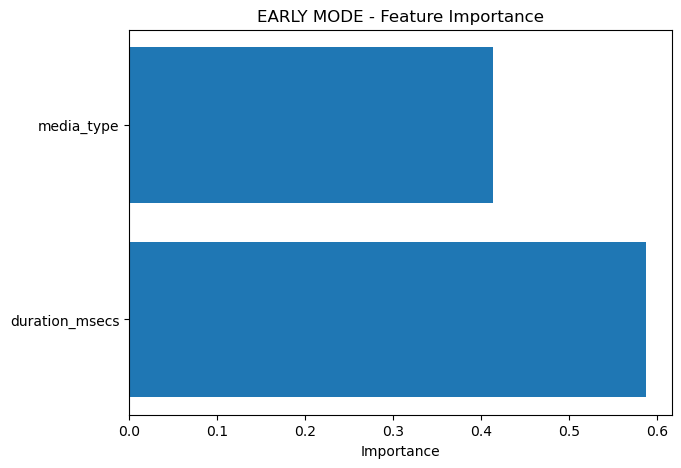

In [30]:
early_model, early_mae, early_r2 = run_xgb_mode(
    data, early_features, Target, early_params, "Early Mode"
)
plot_feature_importance(
    early_model, early_features, "EARLY MODE - Feature Importance"
)

In [31]:
# MODE 2: PRE MODE
pre_features = [
    "duration_msecs",
    "count_loads",
    "count_plays",
    "load_play_ratio"
]

pre_params = {
    "n_estimators": 350,
    "learning_rate": 0.05,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "objective": "reg:squarederror",
    "random_state": 42
}   

Mode: Pre Mode(48 hrs)
Mean Absolute Error: 17.262646243406472
R^2 Score: 0.44284724218642446



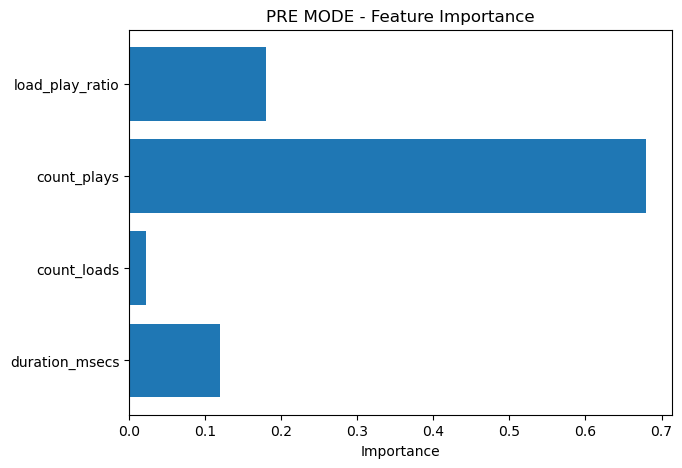

In [32]:
pre_model, pre_mae, pre_r2 = run_xgb_mode(
    data, pre_features, Target, pre_params, "Pre Mode(48 hrs)"
)

plot_feature_importance(pre_model, pre_features, "PRE MODE - Feature Importance"
)

In [33]:
# Mid Mode
mid_features = [
    "duration_msecs",
    "count_loads",
    "count_plays",
    "load_play_ratio",
    "unique_viewers",
    "unique_known_users"
]

mid_params = {
    "n_estimators": 400,
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "objective": "reg:squarederror",
    "random_state": 42
}


Mode: Mid Mode
Mean Absolute Error: 16.677926197847096
R^2 Score: 0.4671720801387488



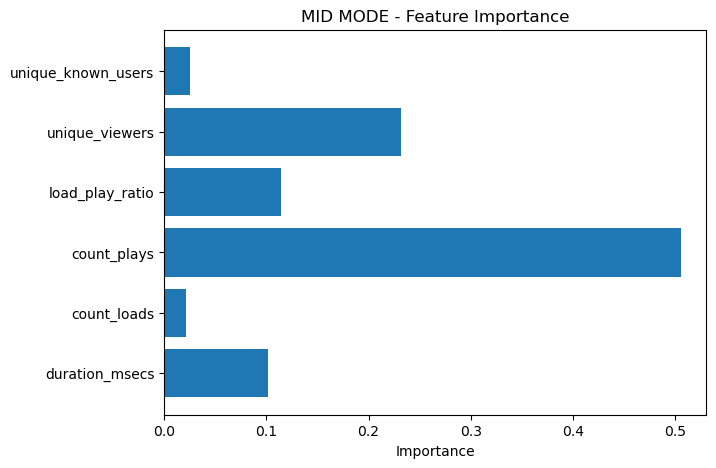

In [34]:
mid_model, mid_mae, mid_r2 = run_xgb_mode(
    data, mid_features, Target, mid_params, "Mid Mode"
)

plot_feature_importance(mid_model, mid_features, "MID MODE - Feature Importance"
)


In [44]:
# Full_Features
full_features = [
    "duration_msecs",
    "count_loads",
    "count_plays",
    "load_play_ratio",
    "unique_viewers",
    "unique_known_users"
]


full_params = {
    "n_estimators": 500,
    "learning_rate": 0.03,
    "max_depth": 7,
    "subsample": 0.85,
    "colsample_bytree": 0.85,
    "objective": "reg:squarederror",
    "random_state": 42
}

Mode: Full Mode
Mean Absolute Error: 16.593022576838067
R^2 Score: 0.46791376997829837



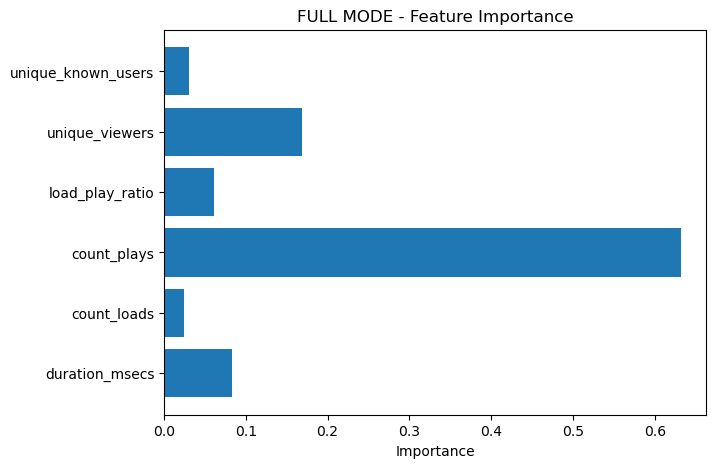

In [45]:
full_model, full_mae, full_r2 = run_xgb_mode(
    data, full_features, Target, full_params, "Full Mode"
)

plot_feature_importance(full_model, full_features, "FULL MODE - Feature Importance"
)

In [46]:
results = pd.DataFrame({
    "Mode": ["Early", "Pre", "Mid", "Full"],
    "MAE": [early_mae, pre_mae, mid_mae, full_mae],
    "R^2": [early_r2, pre_r2, mid_r2, full_r2],   
    "Use_Case": [
        "content planning",
        "early intervention",
        "performance monitoring",
        "post-hoc analysis"
    ]
})

results


,Mode,MAE,R^2,Use_Case
0,Early,28.560407,0.044574,content planning
1,Pre,17.262646,0.442847,early intervention
2,Mid,16.677926,0.467172,performance monitoring
3,Full,16.593023,0.467914,post-hoc analysis


In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

def get_predictions(data, features, target, model_params):
    X = data[features]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    model = XGBRegressor(**model_params)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    return y_test.reset_index(drop=True), preds


In [49]:
# FINAL PREDICTION EXPORT 

TARGET = "avg_completion_rate"

y_test, pred_early = get_predictions(
    data, early_features, TARGET, early_params
)

_, pred_pre = get_predictions(
    data, pre_features, TARGET, pre_params
)

_, pred_mid = get_predictions(
    data, mid_features, TARGET, mid_params
)

_, pred_full = get_predictions(
    data, full_features, TARGET, full_params
)

final_predictions = pd.DataFrame({
    "object_id": data.iloc[-len(y_test):]["object_id"].values,
    "actual_avg_completion_rate": y_test,
    "pred_early": pred_early,
    "pred_pre": pred_pre,
    "pred_mid": pred_mid,
    "pred_full": pred_full
})

final_predictions.to_csv(
    "avg_completion_rate_predictions_4_modes.csv",
    index=False
)

final_predictions.head()


,object_id,actual_avg_completion_rate,pred_early,pred_pre,pred_mid,pred_full
0,1_zzzwwjxy,0.000000,36.377193,1.017901,0.414018,-0.071885
1,1_usidrjrr,41.804762,28.197214,50.638481,50.221043,54.233513
2,1_x2y5hgmy,39.890052,22.556337,41.560169,43.465084,40.068600
3,1_vk86ut5w,26.834416,27.587765,41.259041,40.180580,39.853123
4,1_29kx0rls,30.687204,21.376291,46.031780,50.260658,52.298229
